In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets
%matplotlib inline


In [3]:
boston = datasets.load_boston()

In [10]:
print(boston.DESCR[100:1300])

tics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 

In [6]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [7]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


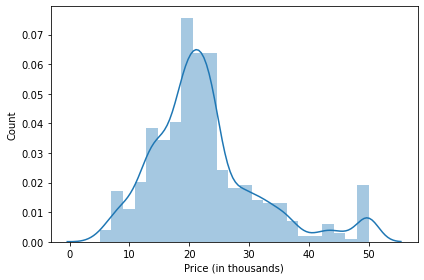

In [8]:
plt.figure(figsize=(6,4))
sns.distplot(boston.target)

plt.xlabel('Price (in thousands)')
plt.ylabel('Count')
plt.tight_layout()

In [14]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
model = linear_regression.fit(boston.data, boston.target)

In [16]:
feature_wright_df = pd.DataFrame(list(zip(boston.feature_names, model.coef_)))
feature_wright_df.columns = ['Feature', 'Weight']
print(feature_wright_df)

    Feature     Weight
0      CRIM  -0.108011
1        ZN   0.046420
2     INDUS   0.020559
3      CHAS   2.686734
4       NOX -17.766611
5        RM   3.809865
6       AGE   0.000692
7       DIS  -1.475567
8       RAD   0.306049
9       TAX  -0.012335
10  PTRATIO  -0.952747
11        B   0.009312
12    LSTAT  -0.524758


In [17]:
import operator

first_predicted = sum(map(
    lambda pair: operator.mul(*pair),
    zip(model.coef_, boston.data[0])
))

print(first_predicted)

-6.455645008073041


In [18]:
print(model.intercept_)

36.459488385089855


In [19]:
first_predicted += model.intercept_
print(first_predicted)

30.003843377016814


In [20]:
predicted = model.predict(boston.data)

print(predicted[:10])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211]


In [21]:
predictions_ground_truth_df = pd.DataFrame(list(zip(predicted, boston.target)))
predictions_ground_truth_df.columns = ['Prediction', 'Grount truth']
predictions_ground_truth_df.head()

,Prediction,Grount truth
0,30.003843,24.0
1,25.025562,21.6
2,30.567597,34.7
3,28.607036,33.4
4,27.943524,36.2


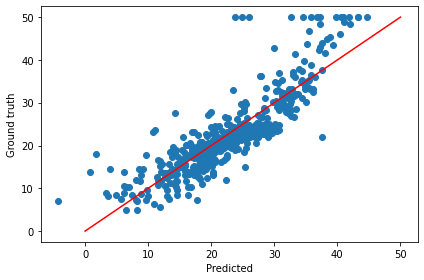

In [23]:
plt.figure(figsize=(6,4))
plt.scatter(predicted, boston.target)
plt.xlabel('Predicted')
plt.ylabel('Ground truth')

plt.plot([0, 50], [0, 50], color="red")
plt.tight_layout()

In [26]:
cancer = datasets.load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [42]:
print(cancer.DESCR[:760])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline appr


In [30]:
cancer_df = pd.DataFrame(cancer.data)
cancer_df.columns = cancer.feature_names
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


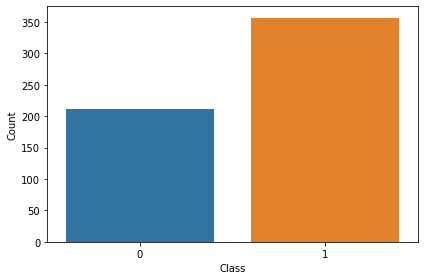

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(cancer.target)

plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()

In [34]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
model = logistic_regression.fit(cancer.data, cancer.target)

print(model.coef_)

[[ 0.93992188  0.45363814  0.28289519 -0.01623003 -0.03488654 -0.16449716
  -0.23033234 -0.09699644 -0.04832641 -0.00963572  0.04078182  0.37027066
   0.14274215 -0.10932016 -0.00315728 -0.03538223 -0.04926916 -0.01263282
  -0.01166827 -0.00328427  0.99914523 -0.50254973 -0.24960281 -0.01373331
  -0.06331502 -0.51312369 -0.63860072 -0.18666133 -0.15329368 -0.0492862 ]]


C:\Users\insta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
prediction = model.predict(cancer.data)
print(prediction[:10])

[0 0 0 1 0 0 0 0 0 0]


In [37]:
prediction = model.predict_proba(cancer.data)
print(prediction[:10])

[[1.00000000e+00 4.15024168e-15]
 [9.99999971e-01 2.88387744e-08]
 [9.99999766e-01 2.34333842e-07]
 [1.53061696e-01 8.46938304e-01]
 [9.99995531e-01 4.46939838e-06]
 [7.27848854e-01 2.72151146e-01]
 [9.99998830e-01 1.17038573e-06]
 [9.67274161e-01 3.27258393e-02]
 [6.89194326e-01 3.10805674e-01]
 [9.80345112e-01 1.96548876e-02]]


In [39]:
print('Accuracy {}'.format(model.score(cancer.data, cancer.target)))

Accuracy 0.9472759226713533


In [40]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}